In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
# Load the dataset
url = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
data = pd.read_csv(url)

In [15]:
# Columns of interest
columns_of_interest = [
    'year', 'country', 'population', 'gdp',
    'solar_consumption', 'wind_consumption', 'hydro_consumption', 
    'fossil_fuel_consumption', 'energy_per_capita', 'energy_per_gdp'
]

In [16]:
subset_data = data[columns_of_interest]

In [17]:
# Drop rows with missing values or fill with zeros
subset_data = subset_data.dropna()

In [18]:
# Filter data for two time periods: 2012-2016 and 2016-2022
period_1 = subset_data[(subset_data['year'] >= 2012) & (subset_data['year'] <= 2016)]
period_2 = subset_data[(subset_data['year'] >= 2016) & (subset_data['year'] <= 2021)]

In [19]:
# Create deep copies of the slices to avoid SettingWithCopyWarning
period_1 = subset_data[(subset_data['year'] >= 2012) & (subset_data['year'] <= 2016)].copy()
period_2 = subset_data[(subset_data['year'] >= 2016) & (subset_data['year'] <= 2021)].copy()

# Calculate total energy consumption for each period
period_1['total_energy_consumption'] = (period_1['solar_consumption'] +
                                        period_1['wind_consumption'] +
                                        period_1['hydro_consumption'] +
                                        period_1['fossil_fuel_consumption'])

period_2['total_energy_consumption'] = (period_2['solar_consumption'] +
                                        period_2['wind_consumption'] +
                                        period_2['hydro_consumption'] +
                                        period_2['fossil_fuel_consumption'])


In [20]:
# Group by country and calculate the mean for each period
period_1_avg = period_1.groupby('country').mean().reset_index()
period_2_avg = period_2.groupby('country').mean().reset_index()

In [21]:
# Merge the two datasets for comparison
comparison = period_1_avg.merge(period_2_avg, on='country', suffixes=('_2012_2016', '_2016_2021'))

In [22]:
# Calculate differences between the two periods
for col in ['population', 'gdp', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 
            'fossil_fuel_consumption', 'energy_per_capita', 'energy_per_gdp', 'total_energy_consumption']:
    comparison[f'{col}_difference'] = comparison[f'{col}_2016_2021'] - comparison[f'{col}_2012_2016']

In [23]:
# Identify the top 5 energy users for each period
top_5_period_1 = period_1.groupby('country')['total_energy_consumption'].sum().reset_index()
top_5_period_1 = top_5_period_1.sort_values(by='total_energy_consumption', ascending=False).head(5)

top_5_period_2 = period_2.groupby('country')['total_energy_consumption'].sum().reset_index()
top_5_period_2 = top_5_period_2.sort_values(by='total_energy_consumption', ascending=False).head(5)

In [24]:
# Display the top 5 energy users
print("Top 5 Energy Users (2012-2016):")
print(top_5_period_1)

Top 5 Energy Users (2012-2016):
          country  total_energy_consumption
68          World                287014.894
12          China                168846.151
64  United States                114336.694
50         Russia                 37829.969
26          India                 37133.562


In [25]:
print("\nTop 5 Energy Users (2016-2021):")
print(top_5_period_2)


Top 5 Energy Users (2016-2021):
          country  total_energy_consumption
69          World                899570.481
12          China                228854.525
65  United States                138790.621
26          India                 52442.754
51         Russia                 46245.459


In [26]:
# Visualization: Bar Charts for Top 5 Energy Users
def plot_top_5(data, title):
    plt.figure(figsize=(8, 6))
    plt.bar(data['country'], data['total_energy_consumption'], color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Total Energy Consumption')
    plt.show()
    plot_top_5(top_5_period_1, 'Top 5 Energy Users (2012-2016)')
    plot_top_5(top_5_period_2, 'Top 5 Energy Users (2016-2021)')

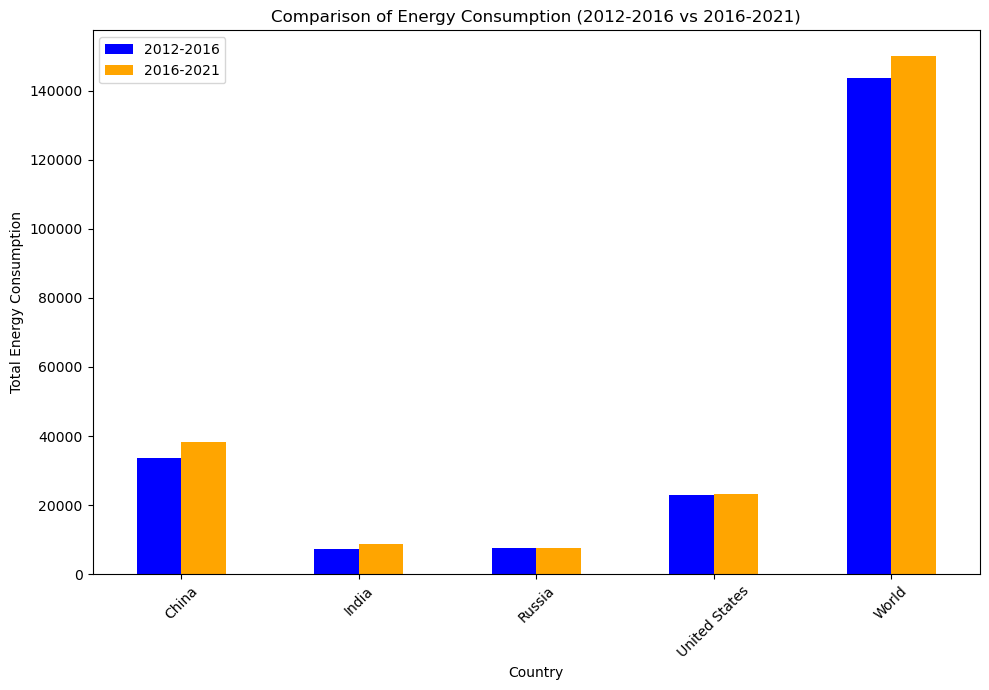

In [27]:
# Visualization: Comparison of the Two Periods
comparison_top_countries = comparison[comparison['country'].isin(top_5_period_1['country']) | comparison['country'].isin(top_5_period_2['country'])]
comparison_top_countries.set_index('country', inplace=True)
comparison_top_countries[['total_energy_consumption_2012_2016', 'total_energy_consumption_2016_2021']].plot(
    kind='bar', figsize=(10, 7), color=['blue', 'orange'])
plt.title('Comparison of Energy Consumption (2012-2016 vs 2016-2021)')
plt.xlabel('Country')
plt.ylabel('Total Energy Consumption')
plt.xticks(rotation=45)
plt.legend(['2012-2016', '2016-2021'])
plt.tight_layout()
plt.show()

BAR CHART

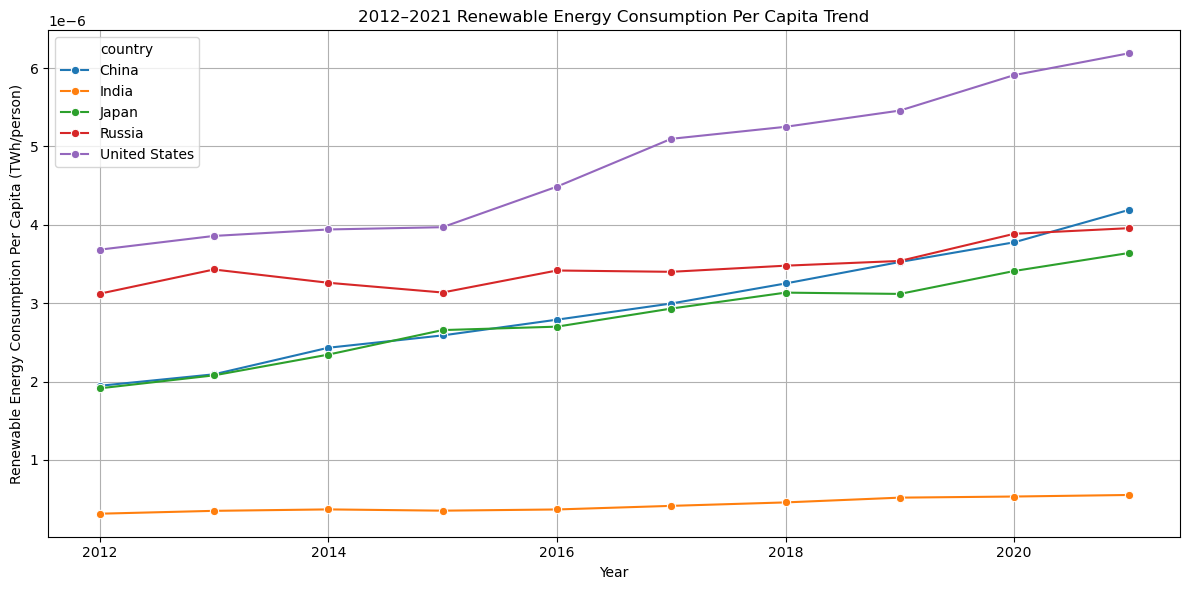

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
data = pd.read_csv(url)

# Select the required columns
columns_of_interest = [
    'year', 'country', 'population', 'gdp',
    'solar_consumption', 'wind_consumption', 'hydro_consumption'
]
df = data[columns_of_interest]

# Fill missing values
df = df.fillna(0)

# Keep only data from 2012 to 2021
df = df[(df['year'] >= 2012) & (df['year'] <= 2021)]

# Filter specific countries
countries = ['China', 'United States', 'Russia', 'India', 'Japan']
df = df[df['country'].isin(countries)]

# Add a "Total Renewables" column
df['total_renewables'] = df['solar_consumption'] + df['wind_consumption'] + df['hydro_consumption']

# Calculate per capita renewable energy consumption
df['renewables_per_capita'] = df['total_renewables'] / df['population']

# Plot the graph for per capita renewable energy consumption
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='renewables_per_capita', hue='country', marker='o')
plt.title('2012–2021 Renewable Energy Consumption Per Capita Trend')
plt.ylabel('Renewable Energy Consumption Per Capita (TWh/person)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()



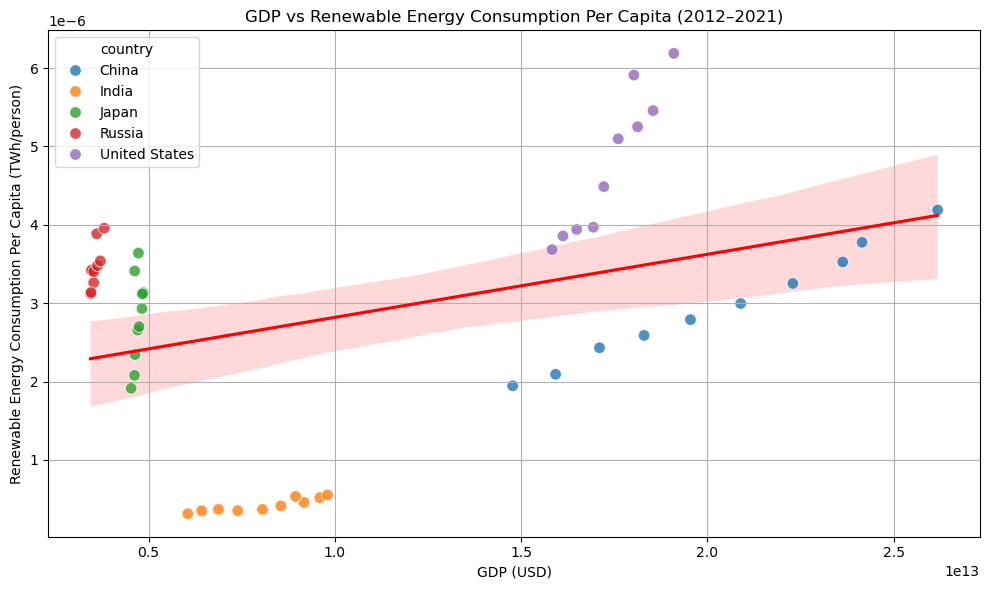

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://github.com/owid/energy-data/raw/master/owid-energy-data.csv"
data = pd.read_csv(url)

# Select the required columns
columns = ['year', 'country', 'population', 'gdp', 'solar_consumption', 'wind_consumption', 'hydro_consumption']
df = data[columns]

# Fill missing values
df = df.fillna(0)

# Filter by years and countries
df = df[(df['year'] >= 2012) & (df['year'] <= 2021)]
df = df[df['country'].isin(['China', 'United States', 'Russia', 'India', 'Japan'])]

# Calculate total renewable energy
df['total_renewables'] = df['solar_consumption'] + df['wind_consumption'] + df['hydro_consumption']

# Calculate per capita renewable energy consumption
df['renewables_per_capita'] = df['total_renewables'] / df['population']

# Plot: GDP vs Renewable Energy Per Capita (with regression line and confidence interval)
plt.figure(figsize=(10, 6))

# Regression line (all countries combined)
sns.regplot(
    data=df,
    x='gdp',
    y='renewables_per_capita',
    scatter=False,
    line_kws={'color': 'red'},
    ci=95  # 95% confidence interval
)

# Add original data points (color by country)
sns.scatterplot(
    data=df,
    x='gdp',
    y='renewables_per_capita',
    hue='country',
    s=70,
    alpha=0.8
)

plt.title('GDP vs Renewable Energy Consumption Per Capita (2012–2021)')
plt.xlabel('GDP (USD)')
plt.ylabel('Renewable Energy Consumption Per Capita (TWh/person)')
plt.grid(True)
plt.tight_layout()
plt.show()


The red line represents the overall trend, showing how renewable energy consumption per capita changes with GDP. The upward slope suggests a positive correlation—countries with higher GDP tend to have higher renewable energy consumption per capita.
The shaded area around the line is the 95% confidence interval, indicating the range within which the true trend likely lies.



Red Regression Line:

The red line represents the overall trend, showing how renewable energy consumption per capita changes with GDP. The upward slope suggests a positive correlation—countries with higher GDP tend to have higher renewable energy consumption per capita.

The shaded area around the line is the 95% confidence interval, indicating the range within which the true trend likely lies.

Country-Specific Insights:

China and the United States:

These countries show higher GDP and correspondingly higher renewable energy consumption per capita. Their data points are typically farther to the right and higher on the y-axis.

India and Russia:

Despite relatively significant GDP levels, they exhibit lower renewable energy consumption per capita. This could suggest slower adoption or reliance on non-renewable resources.

Japan:

Positioned between these extremes, Japan displays moderate levels of both GDP and renewable energy consumption per capita.

Scatter Points (Colored by Country):

Individual dots represent specific data points for each country over the 2012–2021 timeframe. The color coding helps visualize how each country contributes to the observed trend.

Despite a general positive trend, the scatter points suggest that factors beyond GDP (e.g., government policies, infrastructure, natural resources, or cultural priorities) also influence renewable energy consumption.
